In [4]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib

In [34]:
def extract_aucs(list_of_epochs):
    for epoch in list_of_epochs:
        for label, auc in epoch["all_auc"].items():
            epoch[label] = auc
    
        epoch.pop("all_auc")
    
    return list_of_epochs

# RadImageNet Results

In [35]:
RIN_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.6869291663169861, "Cardiomegaly": 0.7284982800483704, "Consolidation": 0.8509191274642944, "Edema": 0.8017857670783997, "Enlarged Cardiomediastinum": 0.5516936779022217, "Fracture": 0.0, "Lung Lesion": 0.0746268630027771, "Lung Opacity": 0.8220211267471313, "Effusion": 0.7729845643043518, "Pleural Other": 0.5671641826629639, "Pneumonia": 0.5837628245353699, "Pneumothorax": 0.783882737159729, "Support Devices": 0.7009904384613037}, "avg_auc": 0.6096352934837341, "avg_auc_of_interest": 0.7682233810424804},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.6785301566123962, "Cardiomegaly": 0.7317290902137756, "Consolidation": 0.8976103067398071, "Edema": 0.8261905312538147, "Enlarged Cardiomediastinum": 0.5612174868583679, "Fracture": 0.0, "Lung Lesion": 0.1791045069694519, "Lung Opacity": 0.8288587331771851, "Effusion": 0.8286912441253662, "Pleural Other": 0.9004974365234375, "Pneumonia": 0.7139175534248352, "Pneumothorax": 0.7772893905639648, "Support Devices": 0.7457095384597778}, "avg_auc": 0.6668726801872253, "avg_auc_of_interest": 0.792550265789032},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.6643569469451904, "Cardiomegaly": 0.6547459363937378, "Consolidation": 0.8702206015586853, "Edema": 0.8269345760345459, "Enlarged Cardiomediastinum": 0.5089837908744812, "Fracture": 0.0, "Lung Lesion": 0.06467664241790771, "Lung Opacity": 0.8209149837493896, "Effusion": 0.82201087474823, "Pleural Other": 0.9054725766181946, "Pneumonia": 0.7268041372299194, "Pneumothorax": 0.6271061897277832, "Support Devices": 0.7685593366622925}, "avg_auc": 0.6354450583457947, "avg_auc_of_interest": 0.7676537871360779},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.6615223288536072, "Cardiomegaly": 0.6530748605728149, "Consolidation": 0.8738970756530762, "Edema": 0.8275297284126282, "Enlarged Cardiomediastinum": 0.46529215574264526, "Fracture": 0.0, "Lung Lesion": 0.1840795874595642, "Lung Opacity": 0.8152840733528137, "Effusion": 0.8177083134651184, "Pleural Other": 0.9203979969024658, "Pneumonia": 0.7796391844749451, "Pneumothorax": 0.5831501483917236, "Support Devices": 0.7648327946662903}, "avg_auc": 0.6420313715934753, "avg_auc_of_interest": 0.766746461391449},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.6441994905471802, "Cardiomegaly": 0.6004902124404907, "Consolidation": 0.8345588445663452, "Edema": 0.8066964149475098, "Enlarged Cardiomediastinum": 0.4093274772167206, "Fracture": 0.0, "Lung Lesion": 0.1840795874595642, "Lung Opacity": 0.7867270112037659, "Effusion": 0.7456974387168884, "Pleural Other": 0.8557214736938477, "Pneumonia": 0.6250000596046448, "Pneumothorax": 0.4842490553855896, "Support Devices": 0.7220751643180847}, "avg_auc": 0.5922170877456665, "avg_auc_of_interest": 0.7263284802436829},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.6194225549697876, "Cardiomegaly": 0.574309229850769, "Consolidation": 0.7891543507575989, "Edema": 0.7934523820877075, "Enlarged Cardiomediastinum": 0.39744722843170166, "Fracture": 0.0, "Lung Lesion": 0.26865673065185547, "Lung Opacity": 0.7567621469497681, "Effusion": 0.68919837474823, "Pleural Other": 0.7661691904067993, "Pneumonia": 0.5779639482498169, "Pneumothorax": 0.5054944753646851, "Support Devices": 0.6861822605133057}, "avg_auc": 0.5710933208465576, "avg_auc_of_interest": 0.6931073784828186},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.6054593324661255, "Cardiomegaly": 0.710004448890686, "Consolidation": 0.835661768913269, "Edema": 0.8180059194564819, "Enlarged Cardiomediastinum": 0.4452626705169678, "Fracture": 0.0, "Lung Lesion": 0.24378108978271484, "Lung Opacity": 0.8046254515647888, "Effusion": 0.7035778760910034, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.6855670213699341, "Pneumothorax": 0.579487144947052, "Support Devices": 0.7176620364189148}, "avg_auc": 0.6169032454490662, "avg_auc_of_interest": 0.7345418691635132},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.6375852823257446, "Cardiomegaly": 0.7225936651229858, "Consolidation": 0.8827205896377563, "Edema": 0.8373512029647827, "Enlarged Cardiomediastinum": 0.4535101056098938, "Fracture": 0.0, "Lung Lesion": 0.1890547275543213, "Lung Opacity": 0.812066376209259, "Effusion": 0.7727581858634949, "Pleural Other": 0.8407959938049316, "Pneumonia": 0.7152062058448792, "Pneumothorax": 0.5567765235900879, "Support Devices": 0.7329607009887695}, "avg_auc": 0.6271830201148987, "avg_auc_of_interest": 0.7706017851829529},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.7015222907066345, "Cardiomegaly": 0.7386363744735718, "Consolidation": 0.8818014860153198, "Edema": 0.8474701642990112, "Enlarged Cardiomediastinum": 0.5330387949943542, "Fracture": 0.0, "Lung Lesion": 0.19402986764907837, "Lung Opacity": 0.8286576271057129, "Effusion": 0.8683196902275085, "Pleural Other": 0.9154228568077087, "Pneumonia": 0.701675295829773, "Pneumothorax": 0.6095237731933594, "Support Devices": 0.7621849775314331}, "avg_auc": 0.660175621509552, "avg_auc_of_interest": 0.8075500011444092},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.673805832862854, "Cardiomegaly": 0.7482174634933472, "Consolidation": 0.8841911554336548, "Edema": 0.8473214507102966, "Enlarged Cardiomediastinum": 0.6081492900848389, "Fracture": 0.0, "Lung Lesion": 0.07960200309753418, "Lung Opacity": 0.8613373637199402, "Effusion": 0.8805480599403381, "Pleural Other": 0.96517413854599, "Pneumonia": 0.7416236996650696, "Pneumothorax": 0.7106226682662964, "Support Devices": 0.7922918200492859}, "avg_auc": 0.6763757467269897, "avg_auc_of_interest": 0.8068167924880981},
]

In [36]:
RIN_list = extract_aucs(RIN_list)
print(RIN_list[0])

{'epoch': 0, 'avg_auc': 0.6096352934837341, 'avg_auc_of_interest': 0.7682233810424804, 'Atelectasis': 0.6869291663169861, 'Cardiomegaly': 0.7284982800483704, 'Consolidation': 0.8509191274642944, 'Edema': 0.8017857670783997, 'Enlarged Cardiomediastinum': 0.5516936779022217, 'Fracture': 0.0, 'Lung Lesion': 0.0746268630027771, 'Lung Opacity': 0.8220211267471313, 'Effusion': 0.7729845643043518, 'Pleural Other': 0.5671641826629639, 'Pneumonia': 0.5837628245353699, 'Pneumothorax': 0.783882737159729, 'Support Devices': 0.7009904384613037}


In [37]:
RIN_df = pd.DataFrame(RIN_list)

In [38]:
RIN_df.head()

,epoch,avg_auc,avg_auc_of_interest,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,0,0.609635,0.768223,0.686929,0.728498,0.850919,0.801786,0.551694,0.0,0.074627,0.822021,0.772985,0.567164,0.583763,0.783883,0.700990
1,1,0.666873,0.792550,0.678530,0.731729,0.897610,0.826191,0.561217,0.0,0.179105,0.828859,0.828691,0.900497,0.713918,0.777289,0.745710
2,2,0.635445,0.767654,0.664357,0.654746,0.870221,0.826935,0.508984,0.0,0.064677,0.820915,0.822011,0.905473,0.726804,0.627106,0.768559
3,3,0.642031,0.766746,0.661522,0.653075,0.873897,0.827530,0.465292,0.0,0.184080,0.815284,0.817708,0.920398,0.779639,0.583150,0.764833
4,4,0.592217,0.726328,0.644199,0.600490,0.834559,0.806696,0.409327,0.0,0.184080,0.786727,0.745697,0.855721,0.625000,0.484249,0.722075


<AxesSubplot: xlabel='epoch'>

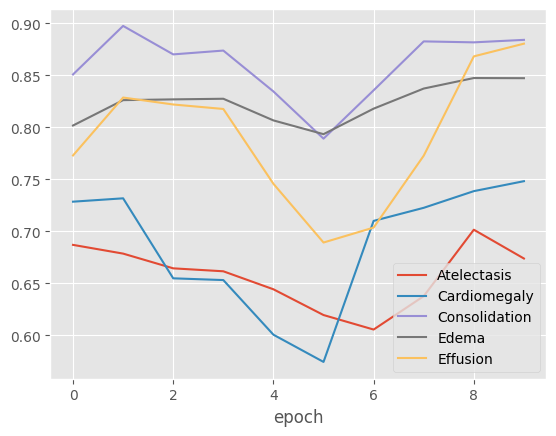

In [41]:
columns = [ 
    # 'avg_auc',
    # 'avg_auc_of_interest',
    'Atelectasis',
    'Cardiomegaly',
    'Consolidation',
    'Edema',
    # 'Enlarged Cardiomediastinum',
    # 'Fracture',
    # 'Lung Lesion',
    # 'Lung Opacity',
    'Effusion',
    # 'Pleural Other',
    # 'Pneumonia',
    # 'Pneumothorax',
    # 'Support Devices',
]
RIN_df.plot(x="epoch", y = columns)

'avg_auc'
'avg_auc_of_interest'
'Atelectasis'
'Cardiomegaly'
'Consolidation'
'Edema'
'Enlarged Cardiomediastinum'
'Fracture'
'Lung Lesion'
'Lung Opacity'
'Effusion'
'Pleural Other'
'Pneumonia'
'Pneumothorax'
'Support Devices'


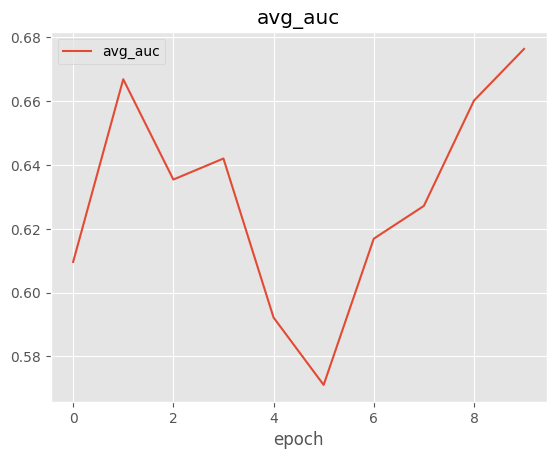

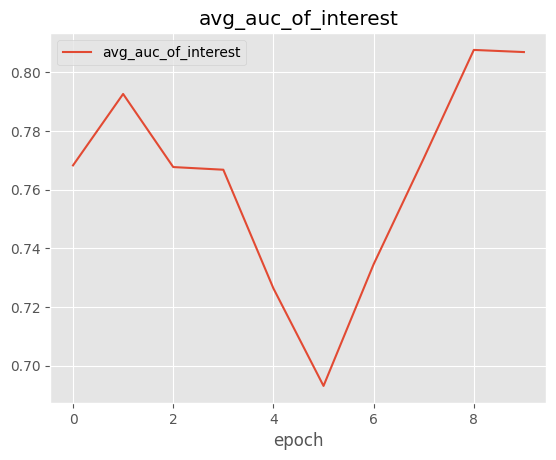

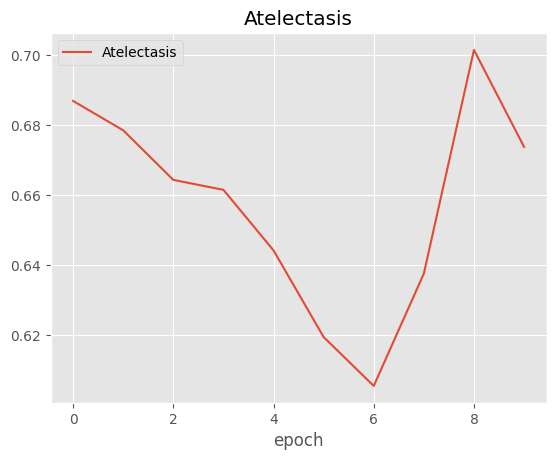

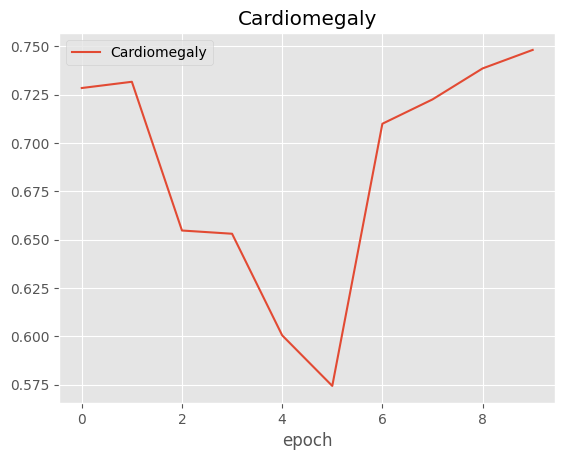

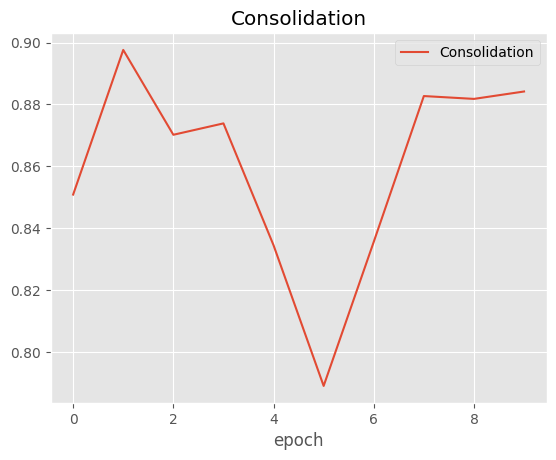

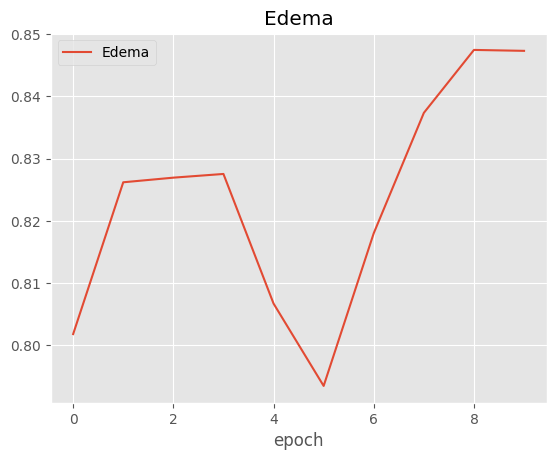

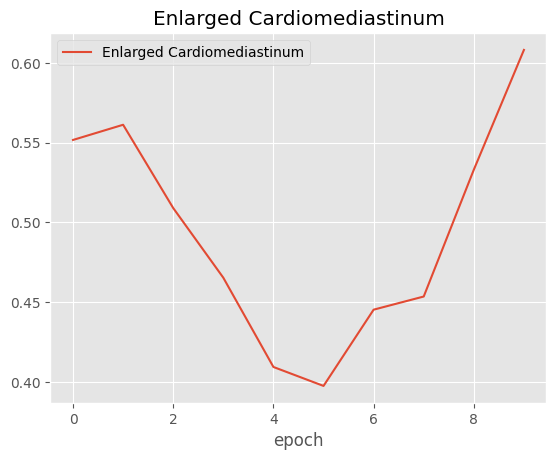

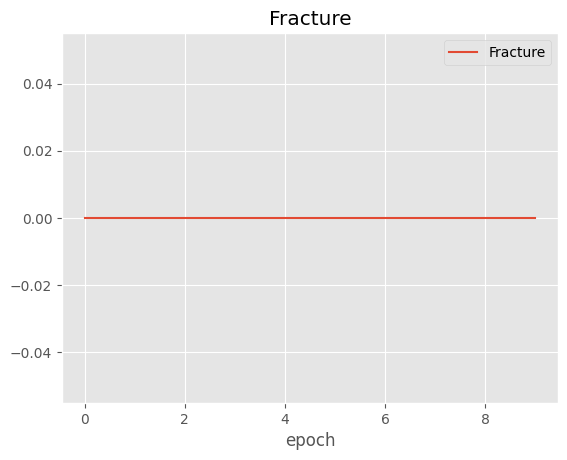

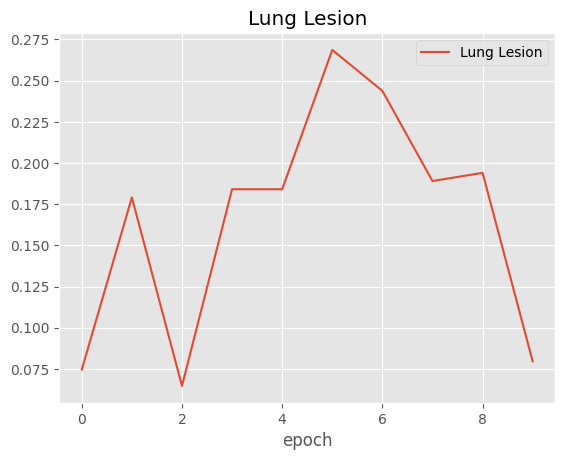

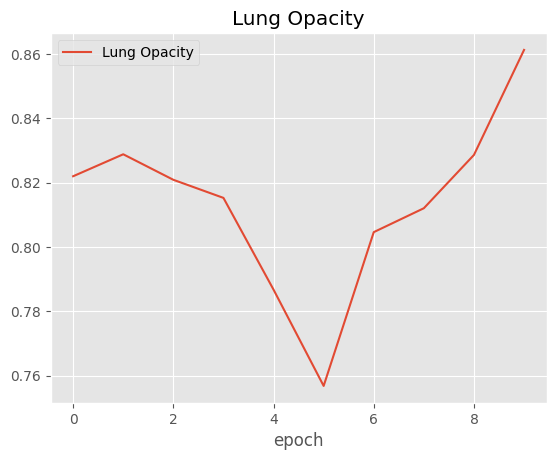

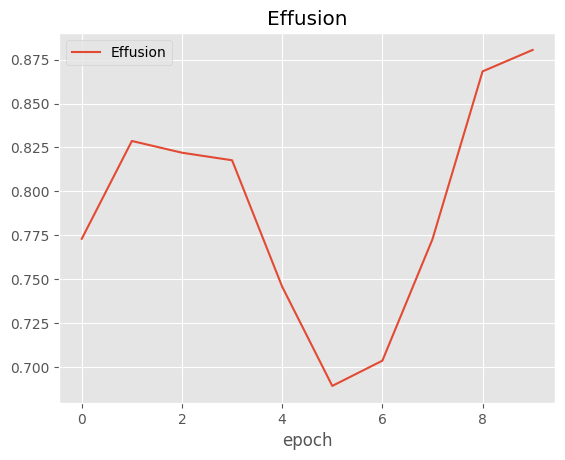

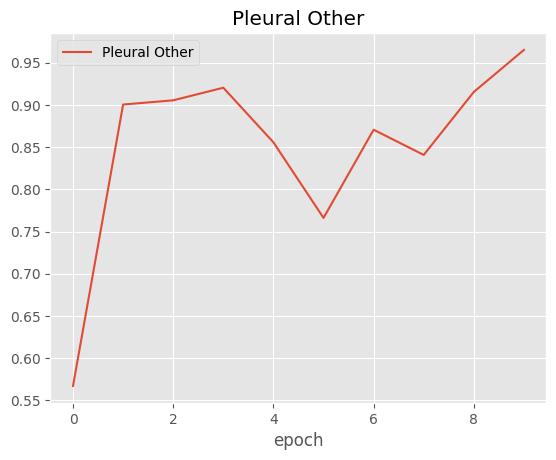

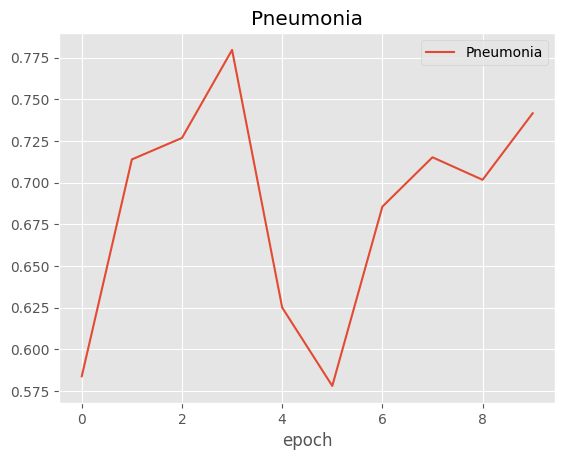

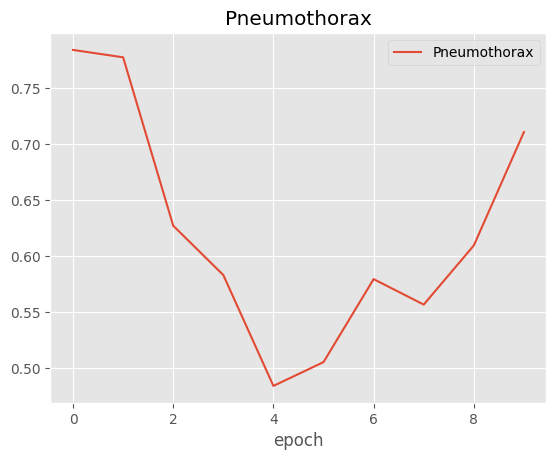

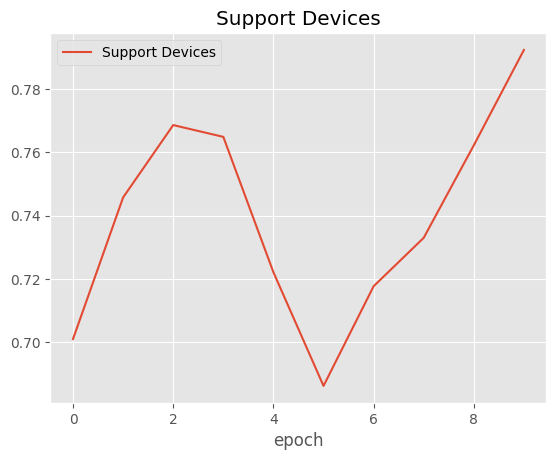

In [39]:

for column in RIN_df.columns[1:]:
    print(f"'{column}'")
    RIN_df.plot(x="epoch", y=column, title =column)

In [22]:
RIN_df.columns[1:]

Index(['all_auc', 'avg_auc', 'avg_auc_of_interest', 'Atelectasis',
       'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
       'Fracture', 'Lung Lesion', 'Lung Opacity', 'Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object')

# ImageNet results

In [35]:
IM_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.7374277710914612, "Cardiomegaly": 0.8062611818313599, "Consolidation": 0.8812500238418579, "Edema": 0.8674107193946838, "Enlarged Cardiomediastinum": 0.6744232177734375, "Fracture": 0.0, "Lung Lesion": 0.11940300464630127, "Lung Opacity": 0.8487682342529297, "Effusion": 0.8966259360313416, "Pleural Other": 0.9701492786407471, "Pneumonia": 0.7873711585998535, "Pneumothorax": 0.8241757750511169, "Support Devices": 0.8353437185287476}, "avg_auc": 0.7114315032958984, "avg_auc_of_interest": 0.8377951264381409},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.7397375106811523, "Cardiomegaly": 0.8049242496490479, "Consolidation": 0.8965073823928833, "Edema": 0.8842262029647827, "Enlarged Cardiomediastinum": 0.6827688217163086, "Fracture": 0.0, "Lung Lesion": 0.12437808513641357, "Lung Opacity": 0.8606334328651428, "Effusion": 0.9200634360313416, "Pleural Other": 0.9601990580558777, "Pneumonia": 0.8067010641098022, "Pneumothorax": 0.8512820601463318, "Support Devices": 0.8455427885055542}, "avg_auc": 0.7213049530982971, "avg_auc_of_interest": 0.8490917563438416},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.7428871393203735, "Cardiomegaly": 0.8045900464057922, "Consolidation": 0.9014706015586853, "Edema": 0.8912201523780823, "Enlarged Cardiomediastinum": 0.6551792025566101, "Fracture": 0.0, "Lung Lesion": 0.26865673065185547, "Lung Opacity": 0.8494721055030823, "Effusion": 0.9338768124580383, "Pleural Other": 0.9154228568077087, "Pneumonia": 0.7944588661193848, "Pneumothorax": 0.817582368850708, "Support Devices": 0.8206335306167603}, "avg_auc": 0.7227269411087036, "avg_auc_of_interest": 0.8548089504241944},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.7393175959587097, "Cardiomegaly": 0.7604723572731018, "Consolidation": 0.8860293626785278, "Edema": 0.8555058836936951, "Enlarged Cardiomediastinum": 0.5314677953720093, "Fracture": 0.0, "Lung Lesion": 0.24875622987747192, "Lung Opacity": 0.8396179676055908, "Effusion": 0.929800808429718, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.7957474589347839, "Pneumothorax": 0.8117216229438782, "Support Devices": 0.8092575669288635}, "avg_auc": 0.6983338594436646, "avg_auc_of_interest": 0.8342252016067505},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.7441470623016357, "Cardiomegaly": 0.7340686321258545, "Consolidation": 0.8327205181121826, "Edema": 0.8449404835700989, "Enlarged Cardiomediastinum": 0.6516445875167847, "Fracture": 0.0, "Lung Lesion": 0.1791045069694519, "Lung Opacity": 0.8243338465690613, "Effusion": 0.9065897464752197, "Pleural Other": 0.8955222964286804, "Pneumonia": 0.688144326210022, "Pneumothorax": 0.7201464772224426, "Support Devices": 0.7872903943061829}, "avg_auc": 0.6775887608528137, "avg_auc_of_interest": 0.8124932885169983},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.6996325254440308, "Cardiomegaly": 0.7362967729568481, "Consolidation": 0.8033088445663452, "Edema": 0.8022321462631226, "Enlarged Cardiomediastinum": 0.6407461762428284, "Fracture": 0.0, "Lung Lesion": 0.03482586145401001, "Lung Opacity": 0.7492207288742065, "Effusion": 0.9048912525177002, "Pleural Other": 0.8507463335990906, "Pneumonia": 0.7145618200302124, "Pneumothorax": 0.7970695495605469, "Support Devices": 0.8235755562782288}, "avg_auc": 0.6582390666007996, "avg_auc_of_interest": 0.7892723083496094},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.7188451290130615, "Cardiomegaly": 0.7521167397499084, "Consolidation": 0.8069853186607361, "Edema": 0.8028274178504944, "Enlarged Cardiomediastinum": 0.6479136347770691, "Fracture": 0.0, "Lung Lesion": 0.2636815905570984, "Lung Opacity": 0.7458018660545349, "Effusion": 0.8828124403953552, "Pleural Other": 0.8308457136154175, "Pneumonia": 0.5889174938201904, "Pneumothorax": 0.8014651536941528, "Support Devices": 0.7857213020324707}, "avg_auc": 0.6636871695518494, "avg_auc_of_interest": 0.7927174091339111},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.7231496572494507, "Cardiomegaly": 0.7277183532714844, "Consolidation": 0.7461397647857666, "Edema": 0.7998512387275696, "Enlarged Cardiomediastinum": 0.6193422079086304, "Fracture": 0.0, "Lung Lesion": 0.23383086919784546, "Lung Opacity": 0.7430869340896606, "Effusion": 0.8838315010070801, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.6030927896499634, "Pneumothorax": 0.7809523940086365, "Support Devices": 0.7847406268119812}, "avg_auc": 0.6551064252853394, "avg_auc_of_interest": 0.7761381030082702},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.7601050138473511, "Cardiomegaly": 0.7508912086486816, "Consolidation": 0.7413603067398071, "Edema": 0.805059552192688, "Enlarged Cardiomediastinum": 0.6034364700317383, "Fracture": 0.0, "Lung Lesion": 0.049751222133636475, "Lung Opacity": 0.7717446088790894, "Effusion": 0.8747736215591431, "Pleural Other": 0.93034827709198, "Pneumonia": 0.594716489315033, "Pneumothorax": 0.7465201616287231, "Support Devices": 0.8105325102806091}, "avg_auc": 0.6491722464561462, "avg_auc_of_interest": 0.7864379405975341},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.682414710521698, "Cardiomegaly": 0.7040997743606567, "Consolidation": 0.7231618165969849, "Edema": 0.8428571224212646, "Enlarged Cardiomediastinum": 0.517231285572052, "Fracture": 0.0, "Lung Lesion": 0.03980100154876709, "Lung Opacity": 0.7112116813659668, "Effusion": 0.8833785653114319, "Pleural Other": 0.6965174078941345, "Pneumonia": 0.6153350472450256, "Pneumothorax": 0.7157508730888367, "Support Devices": 0.8267138004302979}, "avg_auc": 0.6121901869773865, "avg_auc_of_interest": 0.7671823978424073},
]

In [36]:
IM_list = extract_aucs(IM_list)
print(IM_list[0])

{'epoch': 0, 'all_auc': {'Atelectasis': 0.7374277710914612, 'Cardiomegaly': 0.8062611818313599, 'Consolidation': 0.8812500238418579, 'Edema': 0.8674107193946838, 'Enlarged Cardiomediastinum': 0.6744232177734375, 'Fracture': 0.0, 'Lung Lesion': 0.11940300464630127, 'Lung Opacity': 0.8487682342529297, 'Effusion': 0.8966259360313416, 'Pleural Other': 0.9701492786407471, 'Pneumonia': 0.7873711585998535, 'Pneumothorax': 0.8241757750511169, 'Support Devices': 0.8353437185287476}, 'avg_auc': 0.7114315032958984, 'avg_auc_of_interest': 0.8377951264381409, 'Atelectasis': 0.7374277710914612, 'Cardiomegaly': 0.8062611818313599, 'Consolidation': 0.8812500238418579, 'Edema': 0.8674107193946838, 'Enlarged Cardiomediastinum': 0.6744232177734375, 'Fracture': 0.0, 'Lung Lesion': 0.11940300464630127, 'Lung Opacity': 0.8487682342529297, 'Effusion': 0.8966259360313416, 'Pleural Other': 0.9701492786407471, 'Pneumonia': 0.7873711585998535, 'Pneumothorax': 0.8241757750511169, 'Support Devices': 0.835343718528

In [37]:
IM_df = pd.DataFrame(IM_list)

In [38]:
IM_df.head()

,epoch,all_auc,avg_auc,avg_auc_of_interest,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,0,"{'Atelectasis': 0.7374277710914612, 'Cardiomeg...",0.711432,0.837795,0.737428,0.806261,0.881250,0.867411,0.674423,0.0,0.119403,0.848768,0.896626,0.970149,0.787371,0.824176,0.835344
1,1,"{'Atelectasis': 0.7397375106811523, 'Cardiomeg...",0.721305,0.849092,0.739738,0.804924,0.896507,0.884226,0.682769,0.0,0.124378,0.860633,0.920063,0.960199,0.806701,0.851282,0.845543
2,2,"{'Atelectasis': 0.7428871393203735, 'Cardiomeg...",0.722727,0.854809,0.742887,0.804590,0.901471,0.891220,0.655179,0.0,0.268657,0.849472,0.933877,0.915423,0.794459,0.817582,0.820634
3,3,"{'Atelectasis': 0.7393175959587097, 'Cardiomeg...",0.698334,0.834225,0.739318,0.760472,0.886029,0.855506,0.531468,0.0,0.248756,0.839618,0.929801,0.870647,0.795747,0.811722,0.809258
4,4,"{'Atelectasis': 0.7441470623016357, 'Cardiomeg...",0.677589,0.812493,0.744147,0.734069,0.832721,0.844940,0.651645,0.0,0.179105,0.824334,0.906590,0.895522,0.688144,0.720146,0.787290


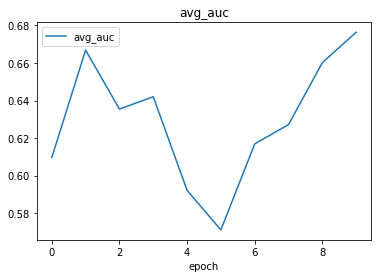

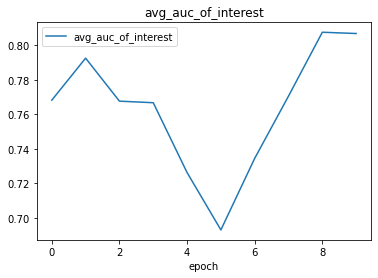

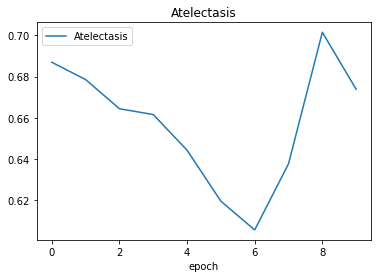

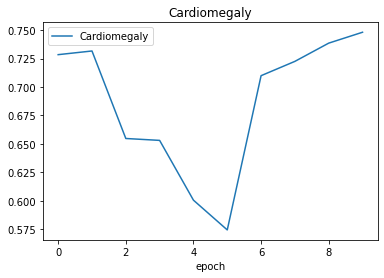

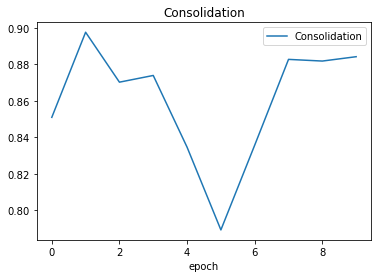

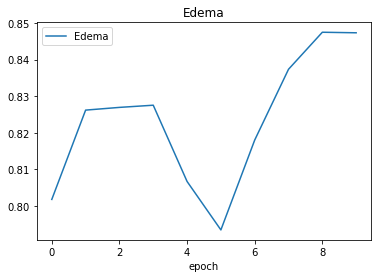

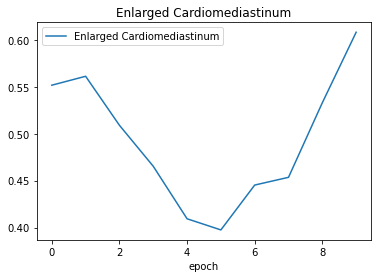

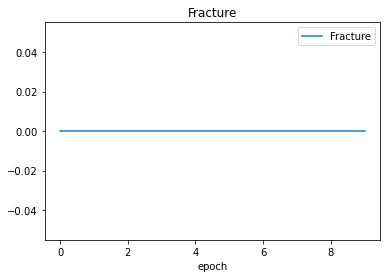

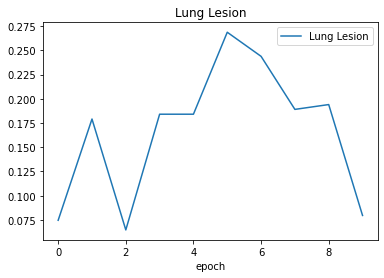

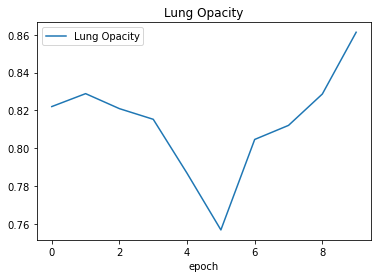

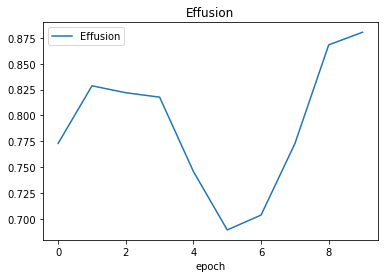

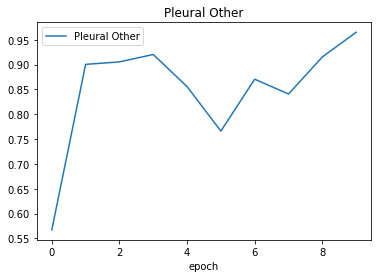

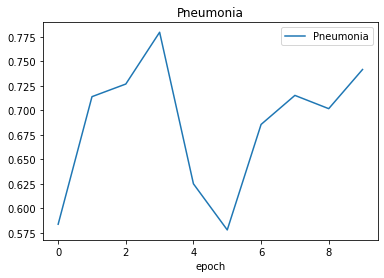

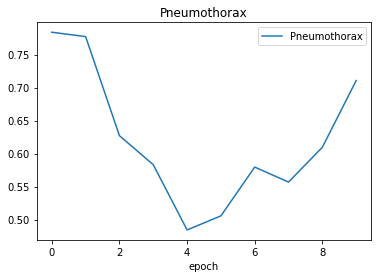

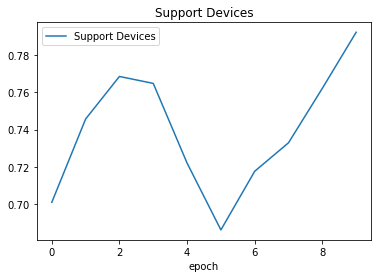

In [39]:
for column in RIN_df.columns[1:]:
    RIN_df.plot(x="epoch", y=column, title =column)

# Consolidation of results

In [1]:
RIN_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.6869291663169861, "Cardiomegaly": 0.7284982800483704, "Consolidation": 0.8509191274642944, "Edema": 0.8017857670783997, "Enlarged Cardiomediastinum": 0.5516936779022217, "Fracture": 0.0, "Lung Lesion": 0.0746268630027771, "Lung Opacity": 0.8220211267471313, "Effusion": 0.7729845643043518, "Pleural Other": 0.5671641826629639, "Pneumonia": 0.5837628245353699, "Pneumothorax": 0.783882737159729, "Support Devices": 0.7009904384613037}, "avg_auc": 0.6096352934837341, "avg_auc_of_interest": 0.7682233810424804},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.6785301566123962, "Cardiomegaly": 0.7317290902137756, "Consolidation": 0.8976103067398071, "Edema": 0.8261905312538147, "Enlarged Cardiomediastinum": 0.5612174868583679, "Fracture": 0.0, "Lung Lesion": 0.1791045069694519, "Lung Opacity": 0.8288587331771851, "Effusion": 0.8286912441253662, "Pleural Other": 0.9004974365234375, "Pneumonia": 0.7139175534248352, "Pneumothorax": 0.7772893905639648, "Support Devices": 0.7457095384597778}, "avg_auc": 0.6668726801872253, "avg_auc_of_interest": 0.792550265789032},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.6643569469451904, "Cardiomegaly": 0.6547459363937378, "Consolidation": 0.8702206015586853, "Edema": 0.8269345760345459, "Enlarged Cardiomediastinum": 0.5089837908744812, "Fracture": 0.0, "Lung Lesion": 0.06467664241790771, "Lung Opacity": 0.8209149837493896, "Effusion": 0.82201087474823, "Pleural Other": 0.9054725766181946, "Pneumonia": 0.7268041372299194, "Pneumothorax": 0.6271061897277832, "Support Devices": 0.7685593366622925}, "avg_auc": 0.6354450583457947, "avg_auc_of_interest": 0.7676537871360779},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.6615223288536072, "Cardiomegaly": 0.6530748605728149, "Consolidation": 0.8738970756530762, "Edema": 0.8275297284126282, "Enlarged Cardiomediastinum": 0.46529215574264526, "Fracture": 0.0, "Lung Lesion": 0.1840795874595642, "Lung Opacity": 0.8152840733528137, "Effusion": 0.8177083134651184, "Pleural Other": 0.9203979969024658, "Pneumonia": 0.7796391844749451, "Pneumothorax": 0.5831501483917236, "Support Devices": 0.7648327946662903}, "avg_auc": 0.6420313715934753, "avg_auc_of_interest": 0.766746461391449},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.6441994905471802, "Cardiomegaly": 0.6004902124404907, "Consolidation": 0.8345588445663452, "Edema": 0.8066964149475098, "Enlarged Cardiomediastinum": 0.4093274772167206, "Fracture": 0.0, "Lung Lesion": 0.1840795874595642, "Lung Opacity": 0.7867270112037659, "Effusion": 0.7456974387168884, "Pleural Other": 0.8557214736938477, "Pneumonia": 0.6250000596046448, "Pneumothorax": 0.4842490553855896, "Support Devices": 0.7220751643180847}, "avg_auc": 0.5922170877456665, "avg_auc_of_interest": 0.7263284802436829},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.6194225549697876, "Cardiomegaly": 0.574309229850769, "Consolidation": 0.7891543507575989, "Edema": 0.7934523820877075, "Enlarged Cardiomediastinum": 0.39744722843170166, "Fracture": 0.0, "Lung Lesion": 0.26865673065185547, "Lung Opacity": 0.7567621469497681, "Effusion": 0.68919837474823, "Pleural Other": 0.7661691904067993, "Pneumonia": 0.5779639482498169, "Pneumothorax": 0.5054944753646851, "Support Devices": 0.6861822605133057}, "avg_auc": 0.5710933208465576, "avg_auc_of_interest": 0.6931073784828186},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.6054593324661255, "Cardiomegaly": 0.710004448890686, "Consolidation": 0.835661768913269, "Edema": 0.8180059194564819, "Enlarged Cardiomediastinum": 0.4452626705169678, "Fracture": 0.0, "Lung Lesion": 0.24378108978271484, "Lung Opacity": 0.8046254515647888, "Effusion": 0.7035778760910034, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.6855670213699341, "Pneumothorax": 0.579487144947052, "Support Devices": 0.7176620364189148}, "avg_auc": 0.6169032454490662, "avg_auc_of_interest": 0.7345418691635132},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.6375852823257446, "Cardiomegaly": 0.7225936651229858, "Consolidation": 0.8827205896377563, "Edema": 0.8373512029647827, "Enlarged Cardiomediastinum": 0.4535101056098938, "Fracture": 0.0, "Lung Lesion": 0.1890547275543213, "Lung Opacity": 0.812066376209259, "Effusion": 0.7727581858634949, "Pleural Other": 0.8407959938049316, "Pneumonia": 0.7152062058448792, "Pneumothorax": 0.5567765235900879, "Support Devices": 0.7329607009887695}, "avg_auc": 0.6271830201148987, "avg_auc_of_interest": 0.7706017851829529},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.7015222907066345, "Cardiomegaly": 0.7386363744735718, "Consolidation": 0.8818014860153198, "Edema": 0.8474701642990112, "Enlarged Cardiomediastinum": 0.5330387949943542, "Fracture": 0.0, "Lung Lesion": 0.19402986764907837, "Lung Opacity": 0.8286576271057129, "Effusion": 0.8683196902275085, "Pleural Other": 0.9154228568077087, "Pneumonia": 0.701675295829773, "Pneumothorax": 0.6095237731933594, "Support Devices": 0.7621849775314331}, "avg_auc": 0.660175621509552, "avg_auc_of_interest": 0.8075500011444092},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.673805832862854, "Cardiomegaly": 0.7482174634933472, "Consolidation": 0.8841911554336548, "Edema": 0.8473214507102966, "Enlarged Cardiomediastinum": 0.6081492900848389, "Fracture": 0.0, "Lung Lesion": 0.07960200309753418, "Lung Opacity": 0.8613373637199402, "Effusion": 0.8805480599403381, "Pleural Other": 0.96517413854599, "Pneumonia": 0.7416236996650696, "Pneumothorax": 0.7106226682662964, "Support Devices": 0.7922918200492859}, "avg_auc": 0.6763757467269897, "avg_auc_of_interest": 0.8068167924880981},
]

IM_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.7374277710914612, "Cardiomegaly": 0.8062611818313599, "Consolidation": 0.8812500238418579, "Edema": 0.8674107193946838, "Enlarged Cardiomediastinum": 0.6744232177734375, "Fracture": 0.0, "Lung Lesion": 0.11940300464630127, "Lung Opacity": 0.8487682342529297, "Effusion": 0.8966259360313416, "Pleural Other": 0.9701492786407471, "Pneumonia": 0.7873711585998535, "Pneumothorax": 0.8241757750511169, "Support Devices": 0.8353437185287476}, "avg_auc": 0.7114315032958984, "avg_auc_of_interest": 0.8377951264381409},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.7397375106811523, "Cardiomegaly": 0.8049242496490479, "Consolidation": 0.8965073823928833, "Edema": 0.8842262029647827, "Enlarged Cardiomediastinum": 0.6827688217163086, "Fracture": 0.0, "Lung Lesion": 0.12437808513641357, "Lung Opacity": 0.8606334328651428, "Effusion": 0.9200634360313416, "Pleural Other": 0.9601990580558777, "Pneumonia": 0.8067010641098022, "Pneumothorax": 0.8512820601463318, "Support Devices": 0.8455427885055542}, "avg_auc": 0.7213049530982971, "avg_auc_of_interest": 0.8490917563438416},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.7428871393203735, "Cardiomegaly": 0.8045900464057922, "Consolidation": 0.9014706015586853, "Edema": 0.8912201523780823, "Enlarged Cardiomediastinum": 0.6551792025566101, "Fracture": 0.0, "Lung Lesion": 0.26865673065185547, "Lung Opacity": 0.8494721055030823, "Effusion": 0.9338768124580383, "Pleural Other": 0.9154228568077087, "Pneumonia": 0.7944588661193848, "Pneumothorax": 0.817582368850708, "Support Devices": 0.8206335306167603}, "avg_auc": 0.7227269411087036, "avg_auc_of_interest": 0.8548089504241944},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.7393175959587097, "Cardiomegaly": 0.7604723572731018, "Consolidation": 0.8860293626785278, "Edema": 0.8555058836936951, "Enlarged Cardiomediastinum": 0.5314677953720093, "Fracture": 0.0, "Lung Lesion": 0.24875622987747192, "Lung Opacity": 0.8396179676055908, "Effusion": 0.929800808429718, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.7957474589347839, "Pneumothorax": 0.8117216229438782, "Support Devices": 0.8092575669288635}, "avg_auc": 0.6983338594436646, "avg_auc_of_interest": 0.8342252016067505},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.7441470623016357, "Cardiomegaly": 0.7340686321258545, "Consolidation": 0.8327205181121826, "Edema": 0.8449404835700989, "Enlarged Cardiomediastinum": 0.6516445875167847, "Fracture": 0.0, "Lung Lesion": 0.1791045069694519, "Lung Opacity": 0.8243338465690613, "Effusion": 0.9065897464752197, "Pleural Other": 0.8955222964286804, "Pneumonia": 0.688144326210022, "Pneumothorax": 0.7201464772224426, "Support Devices": 0.7872903943061829}, "avg_auc": 0.6775887608528137, "avg_auc_of_interest": 0.8124932885169983},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.6996325254440308, "Cardiomegaly": 0.7362967729568481, "Consolidation": 0.8033088445663452, "Edema": 0.8022321462631226, "Enlarged Cardiomediastinum": 0.6407461762428284, "Fracture": 0.0, "Lung Lesion": 0.03482586145401001, "Lung Opacity": 0.7492207288742065, "Effusion": 0.9048912525177002, "Pleural Other": 0.8507463335990906, "Pneumonia": 0.7145618200302124, "Pneumothorax": 0.7970695495605469, "Support Devices": 0.8235755562782288}, "avg_auc": 0.6582390666007996, "avg_auc_of_interest": 0.7892723083496094},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.7188451290130615, "Cardiomegaly": 0.7521167397499084, "Consolidation": 0.8069853186607361, "Edema": 0.8028274178504944, "Enlarged Cardiomediastinum": 0.6479136347770691, "Fracture": 0.0, "Lung Lesion": 0.2636815905570984, "Lung Opacity": 0.7458018660545349, "Effusion": 0.8828124403953552, "Pleural Other": 0.8308457136154175, "Pneumonia": 0.5889174938201904, "Pneumothorax": 0.8014651536941528, "Support Devices": 0.7857213020324707}, "avg_auc": 0.6636871695518494, "avg_auc_of_interest": 0.7927174091339111},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.7231496572494507, "Cardiomegaly": 0.7277183532714844, "Consolidation": 0.7461397647857666, "Edema": 0.7998512387275696, "Enlarged Cardiomediastinum": 0.6193422079086304, "Fracture": 0.0, "Lung Lesion": 0.23383086919784546, "Lung Opacity": 0.7430869340896606, "Effusion": 0.8838315010070801, "Pleural Other": 0.8706467151641846, "Pneumonia": 0.6030927896499634, "Pneumothorax": 0.7809523940086365, "Support Devices": 0.7847406268119812}, "avg_auc": 0.6551064252853394, "avg_auc_of_interest": 0.7761381030082702},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.7601050138473511, "Cardiomegaly": 0.7508912086486816, "Consolidation": 0.7413603067398071, "Edema": 0.805059552192688, "Enlarged Cardiomediastinum": 0.6034364700317383, "Fracture": 0.0, "Lung Lesion": 0.049751222133636475, "Lung Opacity": 0.7717446088790894, "Effusion": 0.8747736215591431, "Pleural Other": 0.93034827709198, "Pneumonia": 0.594716489315033, "Pneumothorax": 0.7465201616287231, "Support Devices": 0.8105325102806091}, "avg_auc": 0.6491722464561462, "avg_auc_of_interest": 0.7864379405975341},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.682414710521698, "Cardiomegaly": 0.7040997743606567, "Consolidation": 0.7231618165969849, "Edema": 0.8428571224212646, "Enlarged Cardiomediastinum": 0.517231285572052, "Fracture": 0.0, "Lung Lesion": 0.03980100154876709, "Lung Opacity": 0.7112116813659668, "Effusion": 0.8833785653114319, "Pleural Other": 0.6965174078941345, "Pneumonia": 0.6153350472450256, "Pneumothorax": 0.7157508730888367, "Support Devices": 0.8267138004302979}, "avg_auc": 0.6121901869773865, "avg_auc_of_interest": 0.7671823978424073},
]

NP_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.3850918710231781, "Cardiomegaly": 0.35171568393707275, "Consolidation": 0.3185661733150482, "Edema": 0.3598214387893677, "Enlarged Cardiomediastinum": 0.3320569396018982, "Fracture": 0.0, "Lung Lesion": 0.4527363181114197, "Lung Opacity": 0.38451480865478516, "Effusion": 0.2647191882133484, "Pleural Other": 0.8308457136154175, "Pneumonia": 0.43427830934524536, "Pneumothorax": 0.5824175477027893, "Support Devices": 0.4887712001800537}, "avg_auc": 0.3988873064517975, "avg_auc_of_interest": 0.33598287105560304},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.48871392011642456, "Cardiomegaly": 0.3910427689552307, "Consolidation": 0.4264705777168274, "Edema": 0.4575892686843872, "Enlarged Cardiomediastinum": 0.4194403290748596, "Fracture": 0.0, "Lung Lesion": 0.46268653869628906, "Lung Opacity": 0.4953242540359497, "Effusion": 0.34476903080940247, "Pleural Other": 0.7910447716712952, "Pneumonia": 0.5070876479148865, "Pneumothorax": 0.7311354875564575, "Support Devices": 0.6435225605964661}, "avg_auc": 0.4737558960914612, "avg_auc_of_interest": 0.42171711325645445},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.6833596229553223, "Cardiomegaly": 0.6497325897216797, "Consolidation": 0.8169117569923401, "Edema": 0.7866071462631226, "Enlarged Cardiomediastinum": 0.7272459864616394, "Fracture": 0.0, "Lung Lesion": 0.38308459520339966, "Lung Opacity": 0.8002010583877563, "Effusion": 0.7420742511749268, "Pleural Other": 0.7213930487632751, "Pneumonia": 0.8524484634399414, "Pneumothorax": 0.7091574668884277, "Support Devices": 0.6811807155609131}, "avg_auc": 0.6579536199569702, "avg_auc_of_interest": 0.7357370734214783},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.6136482954025269, "Cardiomegaly": 0.6334670782089233, "Consolidation": 0.7720588445663452, "Edema": 0.7757440805435181, "Enlarged Cardiomediastinum": 0.6966126561164856, "Fracture": 0.0, "Lung Lesion": 0.42288559675216675, "Lung Opacity": 0.756661593914032, "Effusion": 0.6865941286087036, "Pleural Other": 0.35820895433425903, "Pneumonia": 0.7899484634399414, "Pneumothorax": 0.7567765116691589, "Support Devices": 0.661371111869812}, "avg_auc": 0.6095367074012756, "avg_auc_of_interest": 0.6963024854660034},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.6011549234390259, "Cardiomegaly": 0.6901738047599792, "Consolidation": 0.6509191393852234, "Edema": 0.7678571939468384, "Enlarged Cardiomediastinum": 0.7365733981132507, "Fracture": 0.0, "Lung Lesion": 0.2985074520111084, "Lung Opacity": 0.6859728693962097, "Effusion": 0.4946784973144531, "Pleural Other": 0.5273631811141968, "Pneumonia": 0.6494845151901245, "Pneumothorax": 0.8168497681617737, "Support Devices": 0.6709816455841064}, "avg_auc": 0.5838857889175415, "avg_auc_of_interest": 0.640956711769104},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.5898163318634033, "Cardiomegaly": 0.6918449401855469, "Consolidation": 0.7678309082984924, "Edema": 0.7589285373687744, "Enlarged Cardiomediastinum": 0.7194894552230835, "Fracture": 0.0, "Lung Lesion": 0.26865673065185547, "Lung Opacity": 0.75093013048172, "Effusion": 0.6368885636329651, "Pleural Other": 0.4129353165626526, "Pneumonia": 0.719716489315033, "Pneumothorax": 0.7619047164916992, "Support Devices": 0.64224773645401}, "avg_auc": 0.5939376354217529, "avg_auc_of_interest": 0.6890618562698364},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.5659842491149902, "Cardiomegaly": 0.7163547277450562, "Consolidation": 0.767463207244873, "Edema": 0.7584820985794067, "Enlarged Cardiomediastinum": 0.7236131429672241, "Fracture": 0.0, "Lung Lesion": 0.35323381423950195, "Lung Opacity": 0.7407742738723755, "Effusion": 0.6494565010070801, "Pleural Other": 0.3781094551086426, "Pneumonia": 0.6610824465751648, "Pneumothorax": 0.759706974029541, "Support Devices": 0.6585269570350647}, "avg_auc": 0.594829797744751, "avg_auc_of_interest": 0.6915481567382813},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.5251443386077881, "Cardiomegaly": 0.6997548937797546, "Consolidation": 0.7477940917015076, "Edema": 0.762946367263794, "Enlarged Cardiomediastinum": 0.7143839001655579, "Fracture": 0.0, "Lung Lesion": 0.4427860975265503, "Lung Opacity": 0.7587732672691345, "Effusion": 0.5786911249160767, "Pleural Other": 0.09950250387191772, "Pneumonia": 0.5663659572601318, "Pneumothorax": 0.7750915288925171, "Support Devices": 0.647739589214325}, "avg_auc": 0.5629979968070984, "avg_auc_of_interest": 0.6628661632537842},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.5796325206756592, "Cardiomegaly": 0.7283868789672852, "Consolidation": 0.7827205657958984, "Edema": 0.789434552192688, "Enlarged Cardiomediastinum": 0.736966073513031, "Fracture": 0.0, "Lung Lesion": 0.1791045069694519, "Lung Opacity": 0.7351433038711548, "Effusion": 0.6730072498321533, "Pleural Other": 0.6517412662506104, "Pneumonia": 0.701675295829773, "Pneumothorax": 0.7084249258041382, "Support Devices": 0.7005982398986816}, "avg_auc": 0.6128334403038025, "avg_auc_of_interest": 0.7106363534927368},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.5563254356384277, "Cardiomegaly": 0.6663324236869812, "Consolidation": 0.7784926295280457, "Edema": 0.7218750715255737, "Enlarged Cardiomediastinum": 0.6906234622001648, "Fracture": 0.0, "Lung Lesion": 0.11940300464630127, "Lung Opacity": 0.7000502347946167, "Effusion": 0.6401721239089966, "Pleural Other": 0.4477611780166626, "Pneumonia": 0.7023196220397949, "Pneumothorax": 0.6322343945503235, "Support Devices": 0.7009904384613037}, "avg_auc": 0.5658907294273376, "avg_auc_of_interest": 0.672639536857605},
]
FSeven_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.7733333706855774, "Cardiomegaly": 0.7795231938362122, "Consolidation": 0.863235354423523, "Edema": 0.8270832896232605, "Enlarged Cardiomediastinum": 0.7183112502098083, "Fracture": 0.0, "Lung Lesion": 0.3333333134651184, "Lung Opacity": 0.8423328399658203, "Effusion": 0.8646965622901917, "Pleural Other": 0.9900497198104858, "Pneumonia": 0.7925258278846741, "Pneumothorax": 0.8007326126098633, "Support Devices": 0.8372069597244263}, "avg_auc": 0.724797248840332, "avg_auc_of_interest": 0.821574354171753},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.7821522355079651, "Cardiomegaly": 0.7908868193626404, "Consolidation": 0.879963219165802, "Edema": 0.8611606955528259, "Enlarged Cardiomediastinum": 0.7039764523506165, "Fracture": 0.0, "Lung Lesion": 0.34328359365463257, "Lung Opacity": 0.8601307272911072, "Effusion": 0.8908514380455017, "Pleural Other": 0.9900497198104858, "Pneumonia": 0.8543814420700073, "Pneumothorax": 0.821977972984314, "Support Devices": 0.8608413934707642}, "avg_auc": 0.7415119409561157, "avg_auc_of_interest": 0.841002881526947},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.7724935412406921, "Cardiomegaly": 0.8109403252601624, "Consolidation": 0.8810661435127258, "Edema": 0.8648809194564819, "Enlarged Cardiomediastinum": 0.685027003288269, "Fracture": 0.0, "Lung Lesion": 0.22885572910308838, "Lung Opacity": 0.8561086058616638, "Effusion": 0.901494562625885, "Pleural Other": 0.9950249195098877, "Pneumonia": 0.8524484634399414, "Pneumothorax": 0.7699633836746216, "Support Devices": 0.8685888051986694}, "avg_auc": 0.729761004447937, "avg_auc_of_interest": 0.8461750984191895},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.766194224357605, "Cardiomegaly": 0.8082665205001831, "Consolidation": 0.8952205777168274, "Edema": 0.8485118746757507, "Enlarged Cardiomediastinum": 0.701129138469696, "Fracture": 0.0, "Lung Lesion": 0.2985074520111084, "Lung Opacity": 0.8481648564338684, "Effusion": 0.8962862491607666, "Pleural Other": 0.9900497198104858, "Pneumonia": 0.9020618796348572, "Pneumothorax": 0.7413918972015381, "Support Devices": 0.8429930210113525}, "avg_auc": 0.7337521314620972, "avg_auc_of_interest": 0.8428958892822266},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.7222046852111816, "Cardiomegaly": 0.7570187449455261, "Consolidation": 0.9007351994514465, "Edema": 0.8425594568252563, "Enlarged Cardiomediastinum": 0.6542955040931702, "Fracture": 0.0, "Lung Lesion": 0.46268653869628906, "Lung Opacity": 0.8473604917526245, "Effusion": 0.8928894400596619, "Pleural Other": 0.9800995588302612, "Pneumonia": 0.8943299055099487, "Pneumothorax": 0.7567765116691589, "Support Devices": 0.8309306502342224}, "avg_auc": 0.733991265296936, "avg_auc_of_interest": 0.8230815052986145},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.707506537437439, "Cardiomegaly": 0.779188871383667, "Consolidation": 0.8683823943138123, "Edema": 0.8377976417541504, "Enlarged Cardiomediastinum": 0.6203240156173706, "Fracture": 0.0, "Lung Lesion": 0.34825873374938965, "Lung Opacity": 0.8137757182121277, "Effusion": 0.8834918737411499, "Pleural Other": 0.9900497198104858, "Pneumonia": 0.7983246445655823, "Pneumothorax": 0.7970695495605469, "Support Devices": 0.8316171169281006}, "avg_auc": 0.7135220766067505, "avg_auc_of_interest": 0.8152734637260437},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.7586351633071899, "Cardiomegaly": 0.7588012218475342, "Consolidation": 0.8650734424591064, "Edema": 0.8315476775169373, "Enlarged Cardiomediastinum": 0.6287678480148315, "Fracture": 0.0, "Lung Lesion": 0.49253731966018677, "Lung Opacity": 0.8169934749603271, "Effusion": 0.87941575050354, "Pleural Other": 1.0, "Pneumonia": 0.7680412530899048, "Pneumothorax": 0.8695970773696899, "Support Devices": 0.7954300045967102}, "avg_auc": 0.7280646562576294, "avg_auc_of_interest": 0.8186946511268616},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.7283989787101746, "Cardiomegaly": 0.7599153518676758, "Consolidation": 0.8522058129310608, "Edema": 0.8126487731933594, "Enlarged Cardiomediastinum": 0.6216986179351807, "Fracture": 0.0, "Lung Lesion": 0.0746268630027771, "Lung Opacity": 0.8202111721038818, "Effusion": 0.87669837474823, "Pleural Other": 0.9104477167129517, "Pneumonia": 0.7487114071846008, "Pneumothorax": 0.8410255908966064, "Support Devices": 0.796704888343811}, "avg_auc": 0.6802533268928528, "avg_auc_of_interest": 0.8059734582901001},
    {"epoch": 8, "all_auc": {"Atelectasis": 0.6475590467453003, "Cardiomegaly": 0.7414215803146362, "Consolidation": 0.8327205777168274, "Edema": 0.7809523344039917, "Enlarged Cardiomediastinum": 0.6014727354049683, "Fracture": 0.0, "Lung Lesion": 0.3731343150138855, "Lung Opacity": 0.8218199610710144, "Effusion": 0.8353713750839233, "Pleural Other": 0.9502487778663635, "Pneumonia": 0.6346649527549744, "Pneumothorax": 0.7912087440490723, "Support Devices": 0.7752280235290527}, "avg_auc": 0.6758309602737427, "avg_auc_of_interest": 0.7676049828529358},
    {"epoch": 9, "all_auc": {"Atelectasis": 0.6350656151771545, "Cardiomegaly": 0.72816401720047, "Consolidation": 0.8573529720306396, "Edema": 0.7708333730697632, "Enlarged Cardiomediastinum": 0.5349043011665344, "Fracture": 0.0, "Lung Lesion": 0.39303481578826904, "Lung Opacity": 0.779386579990387, "Effusion": 0.8036684393882751, "Pleural Other": 0.8756219148635864, "Pneumonia": 0.6681700944900513, "Pneumothorax": 0.7846153974533081, "Support Devices": 0.8155339360237122}, "avg_auc": 0.6651040315628052, "avg_auc_of_interest": 0.7590168833732605}

]
FSix_list = [
    {"epoch": 0, "all_auc": {"Atelectasis": 0.778477668762207, "Cardiomegaly": 0.7211452722549438, "Consolidation": 0.8588235974311829, "Edema": 0.7617560029029846, "Enlarged Cardiomediastinum": 0.4678449034690857, "Fracture": 0.0, "Lung Lesion": 0.3034825921058655, "Lung Opacity": 0.815284013748169, "Effusion": 0.8136322498321533, "Pleural Other": 0.7363184690475464, "Pneumonia": 0.4954896569252014, "Pneumothorax": 0.6366299986839294, "Support Devices": 0.7230557799339294}, "avg_auc": 0.6239954233169556, "avg_auc_of_interest": 0.7867669582366943},
    {"epoch": 1, "all_auc": {"Atelectasis": 0.751600980758667, "Cardiomegaly": 0.7789661884307861, "Consolidation": 0.8790440559387207, "Edema": 0.8096726536750793, "Enlarged Cardiomediastinum": 0.7290132641792297, "Fracture": 0.0, "Lung Lesion": 0.09950250387191772, "Lung Opacity": 0.8446455597877502, "Effusion": 0.8560914397239685, "Pleural Other": 0.9154228568077087, "Pneumonia": 0.6320875883102417, "Pneumothorax": 0.7890109419822693, "Support Devices": 0.7745415568351746}, "avg_auc": 0.6815077066421509, "avg_auc_of_interest": 0.8150750637054444},
    {"epoch": 2, "all_auc": {"Atelectasis": 0.7669290900230408, "Cardiomegaly": 0.7717245817184448, "Consolidation": 0.8845587968826294, "Edema": 0.82708340883255, "Enlarged Cardiomediastinum": 0.69317626953125, "Fracture": 0.0, "Lung Lesion": 0.059701502323150635, "Lung Opacity": 0.8525892496109009, "Effusion": 0.8697916269302368, "Pleural Other": 0.9402985572814941, "Pneumonia": 0.7100515365600586, "Pneumothorax": 0.8285714387893677, "Support Devices": 0.8084731101989746}, "avg_auc": 0.6933038234710693, "avg_auc_of_interest": 0.8240175008773803},
    {"epoch": 3, "all_auc": {"Atelectasis": 0.7664042115211487, "Cardiomegaly": 0.7336229085922241, "Consolidation": 0.8740808963775635, "Edema": 0.8279761672019958, "Enlarged Cardiomediastinum": 0.6222877502441406, "Fracture": 0.0, "Lung Lesion": 0.054726362228393555, "Lung Opacity": 0.8339868783950806, "Effusion": 0.8560914993286133, "Pleural Other": 0.96517413854599, "Pneumonia": 0.811211347579956, "Pneumothorax": 0.7970696091651917, "Support Devices": 0.7891536951065063}, "avg_auc": 0.6870604753494263, "avg_auc_of_interest": 0.8116351366043091},
    {"epoch": 4, "all_auc": {"Atelectasis": 0.7764829397201538, "Cardiomegaly": 0.7411987781524658, "Consolidation": 0.8869485259056091, "Edema": 0.858779788017273, "Enlarged Cardiomediastinum": 0.6154148578643799, "Fracture": 0.0, "Lung Lesion": 0.059701502323150635, "Lung Opacity": 0.8581196665763855, "Effusion": 0.8562046885490417, "Pleural Other": 0.9751244187355042, "Pneumonia": 0.813144326210022, "Pneumothorax": 0.8087911605834961, "Support Devices": 0.7517897486686707}, "avg_auc": 0.692438542842865, "avg_auc_of_interest": 0.8239229440689086},
    {"epoch": 5, "all_auc": {"Atelectasis": 0.7990550994873047, "Cardiomegaly": 0.7464349269866943, "Consolidation": 0.892279326915741, "Edema": 0.8592262268066406, "Enlarged Cardiomediastinum": 0.584388792514801, "Fracture": 0.0, "Lung Lesion": 0.019900500774383545, "Lung Opacity": 0.8524886965751648, "Effusion": 0.8663949370384216, "Pleural Other": 0.9800995588302612, "Pneumonia": 0.6778350472450256, "Pneumothorax": 0.7970696091651917, "Support Devices": 0.8091596364974976}, "avg_auc": 0.683410108089447, "avg_auc_of_interest": 0.8326781034469605},
    {"epoch": 6, "all_auc": {"Atelectasis": 0.7895013093948364, "Cardiomegaly": 0.781305730342865, "Consolidation": 0.8718750476837158, "Edema": 0.848214328289032, "Enlarged Cardiomediastinum": 0.6013745665550232, "Fracture": 0.0, "Lung Lesion": 0.014925360679626465, "Lung Opacity": 0.8462544083595276, "Effusion": 0.8523550629615784, "Pleural Other": 0.9402985572814941, "Pneumonia": 0.6842783689498901, "Pneumothorax": 0.7135530710220337, "Support Devices": 0.793468713760376}, "avg_auc": 0.6721080541610718, "avg_auc_of_interest": 0.8286502957344055},
    {"epoch": 7, "all_auc": {"Atelectasis": 0.7815223336219788, "Cardiomegaly": 0.7361853718757629, "Consolidation": 0.8676470518112183, "Edema": 0.8377976417541504, "Enlarged Cardiomediastinum": 0.5517918467521667, "Fracture": 0.0, "Lung Lesion": 0.009950220584869385, "Lung Opacity": 0.8138763308525085, "Effusion": 0.8588088750839233, "Pleural Other": 0.9552238583564758, "Pneumonia": 0.688144326210022, "Pneumothorax": 0.682783842086792, "Support Devices": 0.778366208076477}, "avg_auc": 0.6586229801177979, "avg_auc_of_interest": 0.8163922548294067}
]


In [11]:
def extract_aucs(list_of_epochs):
    for epoch in list_of_epochs:
        for label, auc in epoch["all_auc"].items():
            epoch[label] = auc
    
        epoch.pop("all_auc")
    
    return list_of_epochs

def extract_and_graph(RIN, IM, NP, FSeven, FSix, columns):
    # Pass by reference like :clown:
    for x in [RIN, IM, NP, FSeven, FSix]:
        extract_aucs(x)
    
    RIN_df = pd.DataFrame(RIN)
    IM_df = pd.DataFrame(IM)
    NP_df = pd.DataFrame(NP)
    FSeven_df = pd.DataFrame(FSeven)
    FSix_df = pd.DataFrame(FSix)
    # NP_df = NP_df.rename(columns={c: c+"_NoPreTrain" for c in NP_df.columns if c not in ['epoch']})
    
    # df_best_epoch = pd.DataFrame()
    for df, title in [(RIN_df, "RadImageNet"), (IM_df, "ImageNet"), (NP_df, "NoPreTrain"), (FSeven_df, "Frank7"), (FSix_df, "Frank6")]:
        df.plot(x="epoch", y=columns[2:],  ylim=(0.4, 1), xlim=(0,9), title=title)
        plt.xlabel("Epoch")
        plt.ylabel("AUROC")
        
        # # Find max value in dataframe and get row        
        # best_row = df.iloc[df['avg_auc_of_interest'].idxmax()]
        # best_row['model'] = title
        # df_best_epoch = pd.concat([df_best_epoch, best_row])
        
                
    NP_df = NP_df.rename(columns={c: c+"_NoPreTrain" for c in NP_df.columns if c not in ['epoch']})
    FSeven_df = FSeven_df.rename(columns={c: c+"_Frank7" for c in FSeven_df.columns if c not in ['epoch']})
    FSix_df = FSix_df.rename(columns={c: c+"_Frank6" for c in FSix_df.columns if c not in ['epoch']})
    all_results_df = RIN_df.merge(IM_df, how="inner", on="epoch", suffixes=("_RadImageNet", "_ImageNet"))
    all_results_df = all_results_df.merge(NP_df, how="inner", on="epoch", suffixes=(None,"_NoPreTrain"))
    all_results_df = all_results_df.merge(FSeven_df, how="inner", on="epoch", suffixes=(None,"_Frank7"))
    # all_results_df = all_results_df.merge(FSix_df, how="inner", on="epoch", suffixes=(None,"_Frank6"))
    
    # Results from paper
    standford_results = {
        "Atelectasis": 0.811,
        "Cardiomegaly": 0.840,
        "Consolidation": 0.932,
        "Edema": 0.929,
        "Effusion":0.931,
        "avg_auc_of_interest": 0.8886,
    }
        
    for column in columns:
        series = [f"{column}_RadImageNet",f"{column}_ImageNet", f"{column}_NoPreTrain", f"{column}_Frank7",
                #   f"{column}_Frank6"
                  ]
        all_results_df.plot(x="epoch", y=series, title =column, ylim=(0.4, 1), xlim=(0,9))
        plt.xlabel("Epoch")
        plt.ylabel("AUROC")
        for model in series:
            model_max = max(all_results_df[model])
            model_epoch_max = all_results_df[all_results_df[model] == model_max].index[0]
            model_name = model.split("_")[-1]
            # plt.plot(model_epoch_max, model_max, 'ro')
            # plt.text(model_epoch_max, model_max+0.2, f"Max AUC:{model_max}")
            # plt.annotate(model_name, xy=(model_epoch_max, model_max), xytext=(model_epoch_max, model_max+0.2),
            # arrowprops=dict(facecolor='black', shrink=0.05),
            # )
        if standford_results.get(column):
            plt.axhline(y = standford_results[column], color = 'y', linestyle = '--')
        plt.legend(["RadImageNet","ImageNet", "NoPreTrain", "Frank7", 
                    # "Frank6",
                    "U-Zeros Ens"])
    
    return all_results_df
    

,epoch,avg_auc_RadImageNet,avg_auc_of_interest_RadImageNet,Atelectasis_RadImageNet,Cardiomegaly_RadImageNet,Consolidation_RadImageNet,Edema_RadImageNet,Enlarged Cardiomediastinum_RadImageNet,Fracture_RadImageNet,Lung Lesion_RadImageNet,...,Edema_Frank7,Enlarged Cardiomediastinum_Frank7,Fracture_Frank7,Lung Lesion_Frank7,Lung Opacity_Frank7,Effusion_Frank7,Pleural Other_Frank7,Pneumonia_Frank7,Pneumothorax_Frank7,Support Devices_Frank7
0,0,0.609635,0.768223,0.686929,0.728498,0.850919,0.801786,0.551694,0.0,0.074627,...,0.827083,0.718311,0.0,0.333333,0.842333,0.864697,0.990050,0.792526,0.800733,0.837207
1,1,0.666873,0.792550,0.678530,0.731729,0.897610,0.826191,0.561217,0.0,0.179105,...,0.861161,0.703976,0.0,0.343284,0.860131,0.890851,0.990050,0.854381,0.821978,0.860841
2,2,0.635445,0.767654,0.664357,0.654746,0.870221,0.826935,0.508984,0.0,0.064677,...,0.864881,0.685027,0.0,0.228856,0.856109,0.901495,0.995025,0.852448,0.769963,0.868589
3,3,0.642031,0.766746,0.661522,0.653075,0.873897,0.827530,0.465292,0.0,0.184080,...,0.848512,0.701129,0.0,0.298507,0.848165,0.896286,0.990050,0.902062,0.741392,0.842993
4,4,0.592217,0.726328,0.644199,0.600490,0.834559,0.806696,0.409327,0.0,0.184080,...,0.842559,0.654296,0.0,0.462687,0.847360,0.892889,0.980100,0.894330,0.756777,0.830931
5,5,0.571093,0.693107,0.619423,0.574309,0.789154,0.793452,0.397447,0.0,0.268657,...,0.837798,0.620324,0.0,0.348259,0.813776,0.883492,0.990050,0.798325,0.797070,0.831617
6,6,0.616903,0.734542,0.605459,0.710004,0.835662,0.818006,0.445263,0.0,0.243781,...,0.831548,0.628768,0.0,0.492537,0.816993,0.879416,1.000000,0.768041,0.869597,0.795430
7,7,0.627183,0.770602,0.637585,0.722594,0.882721,0.837351,0.453510,0.0,0.189055,...,0.812649,0.621699,0.0,0.074627,0.820211,0.876698,0.910448,0.748711,0.841026,0.796705
8,8,0.660176,0.807550,0.701522,0.738636,0.881801,0.847470,0.533039,0.0,0.194030,...,0.780952,0.601473,0.0,0.373134,0.821820,0.835371,0.950249,0.634665,0.791209,0.775228
9,9,0.676376,0.806817,0.673806,0.748217,0.884191,0.847321,0.608149,0.0,0.079602,...,0.770833,0.534904,0.0,0.393035,0.779387,0.803668,0.875622,0.668170,0.784615,0.815534


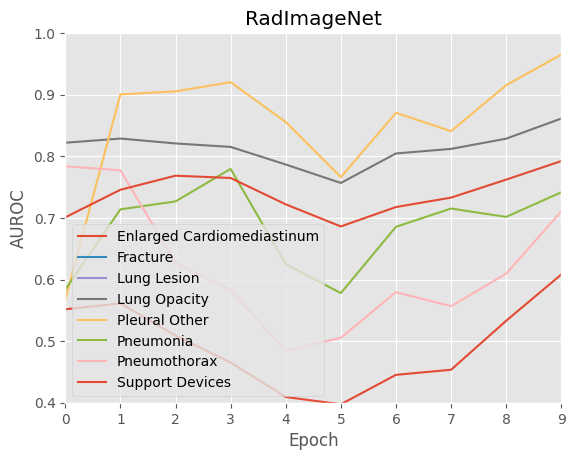

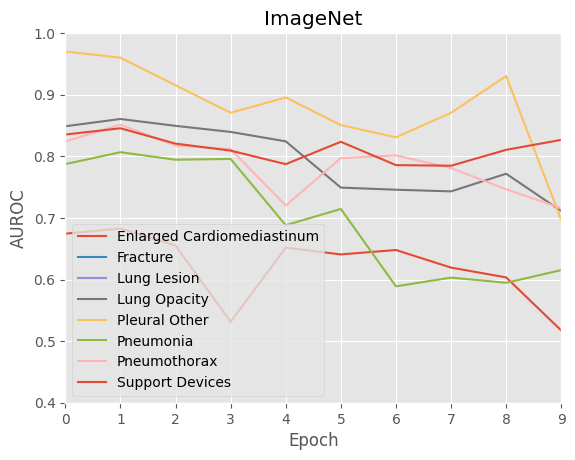

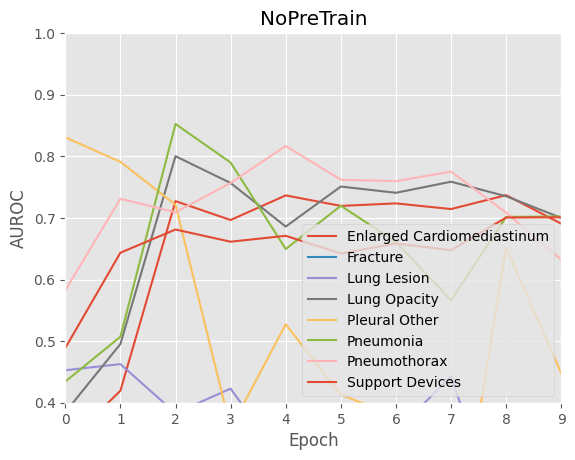

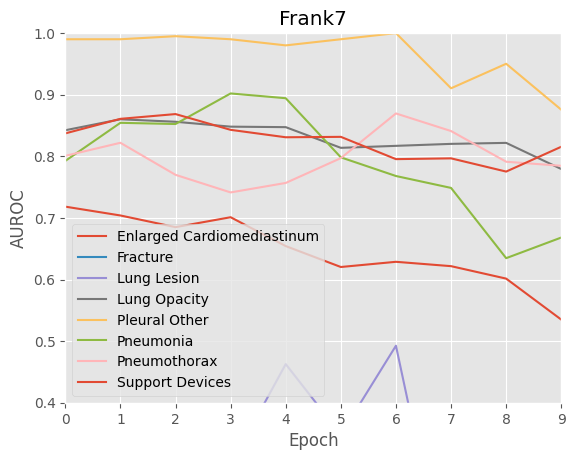

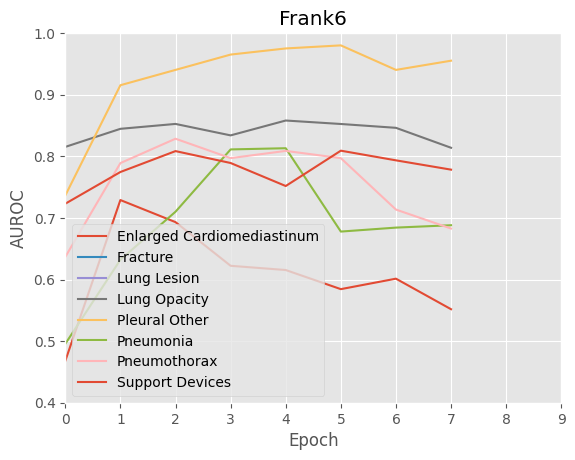

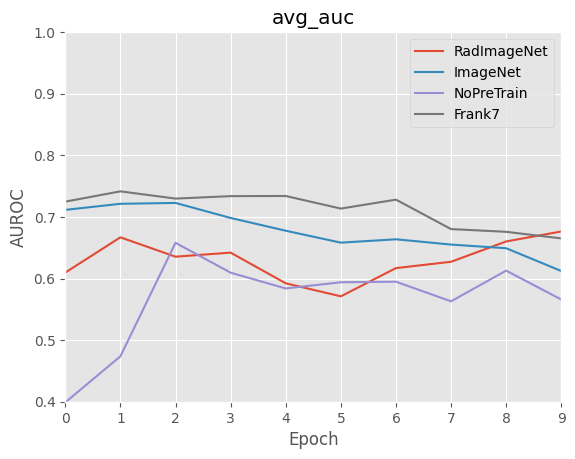

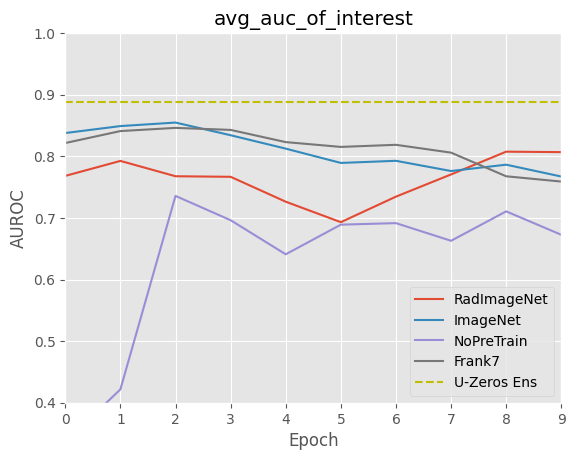

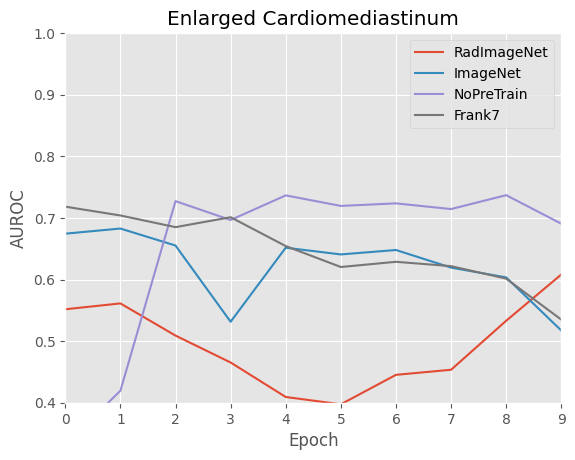

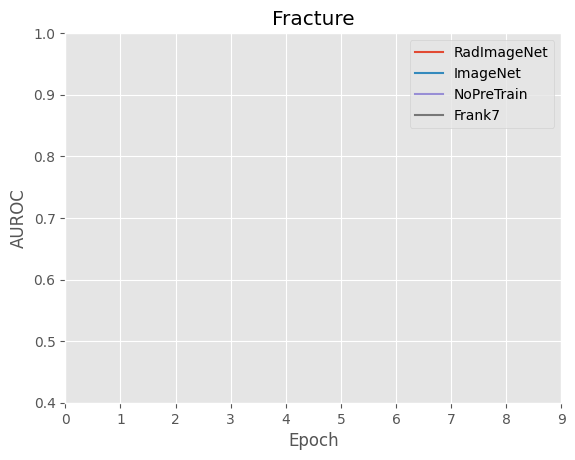

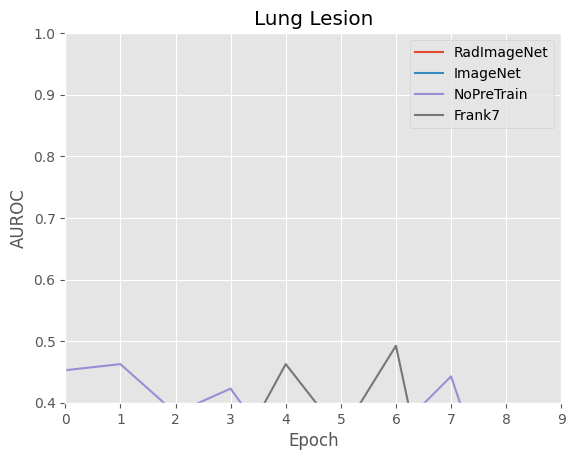

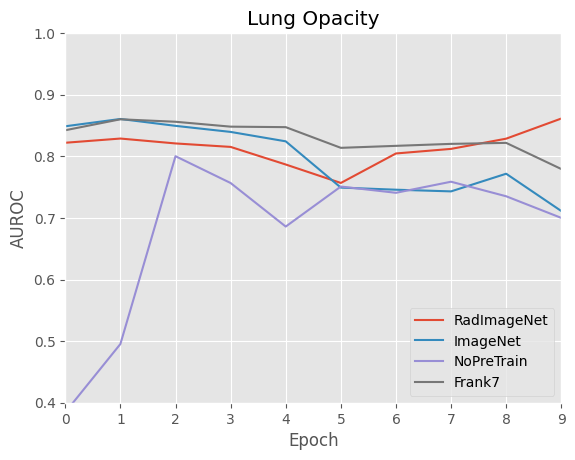

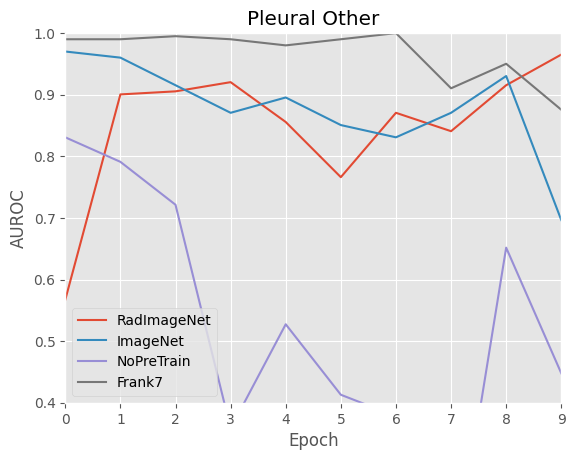

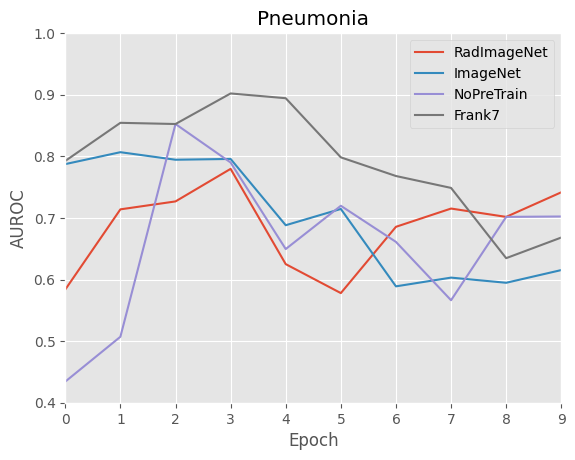

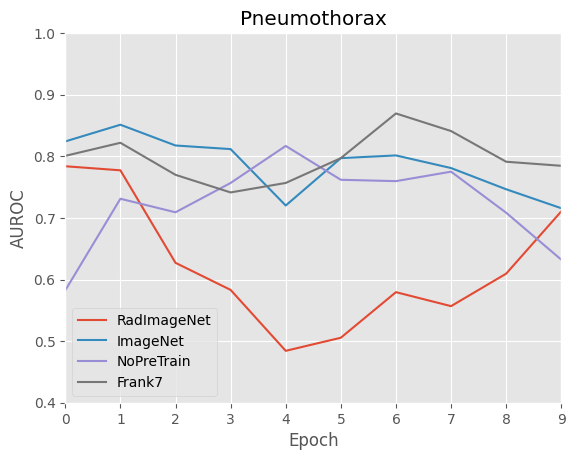

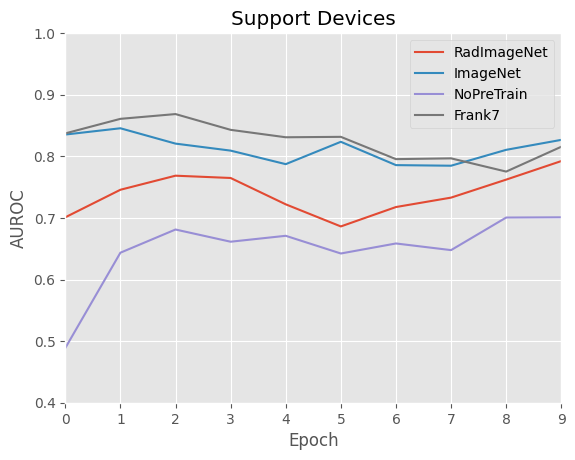

In [13]:

matplotlib.style.use("ggplot")
columns = [ 
    'avg_auc',
    'avg_auc_of_interest',
    # 'Atelectasis',
    # 'Cardiomegaly',
    # 'Consolidation',
    # 'Edema',
    # "Effusion",
    'Enlarged Cardiomediastinum',
    'Fracture',
    'Lung Lesion',
    'Lung Opacity',
    'Pleural Other',
    'Pneumonia',
    'Pneumothorax',
    'Support Devices',
]
extract_and_graph(copy.deepcopy(RIN_list), copy.deepcopy(IM_list), copy.deepcopy(NP_list), copy.deepcopy(FSeven_list), copy.deepcopy(FSix_list), columns = columns)